Shakshi Singh Rajput

U21EC138

Training data shape: (455, 30), Test data shape: (114, 30)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8370 - loss: 0.5024 - val_accuracy: 0.9451 - val_loss: 0.3077
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9750 - loss: 0.2472 - val_accuracy: 0.9560 - val_loss: 0.1915
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9591 - loss: 0.1609 - val_accuracy: 0.9780 - val_loss: 0.1407
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9729 - loss: 0.1244 - val_accuracy: 0.9670 - val_loss: 0.1174
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9780 - loss: 0.1002 - val_accuracy: 0.9780 - val_loss: 0.1060
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9851 - loss: 0.0804 - val_accuracy: 0.9780 - val_loss: 0.0987
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9902 - loss: 0.0683 - val_accuracy: 0.9670 - val_loss: 0.0960
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9755 - loss: 0.0947 - val_accuracy: 0.9670 - val_loss

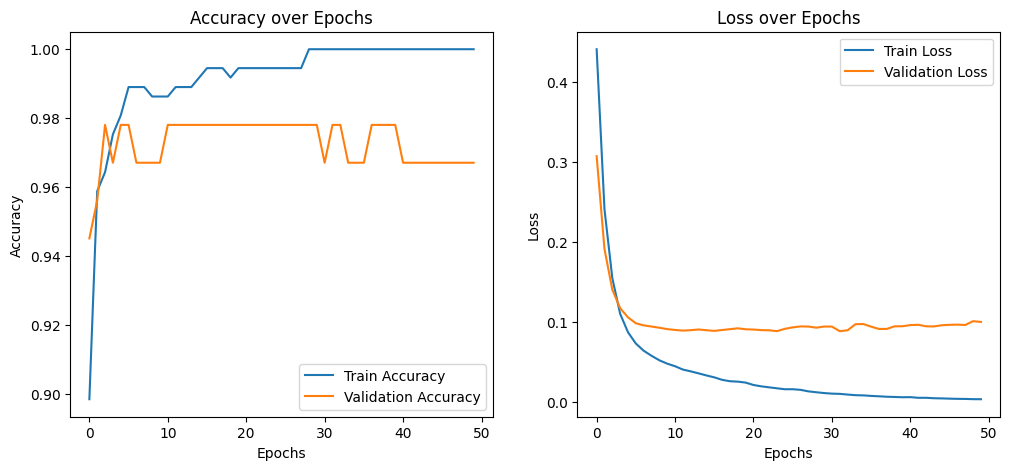

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


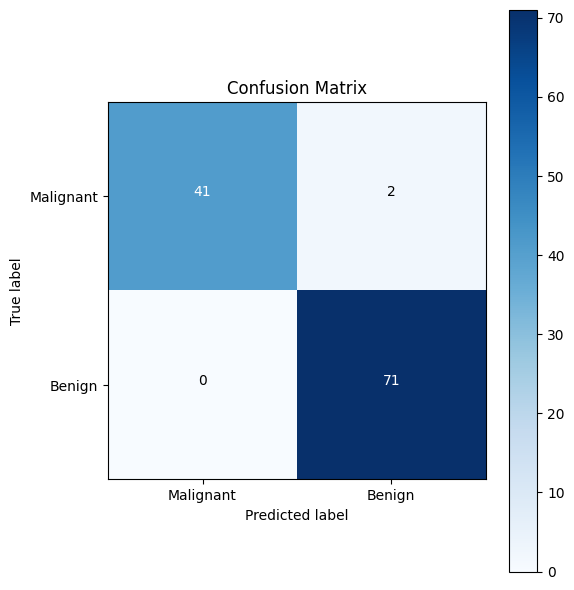

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                              params  accuracy
0   {'epochs': 50, 'batch_size': 32}  0.973684
1  {'epochs': 100, 'batch_size': 64}  0.973684
The model's performance indicates effective classification, with potential areas for improvement in hyperparameter tuning.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f'Training data shape: {X_train.shape}, Test data shape: {X_test.shape}')

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model's performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Analyze the performance using a confusion matrix and classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Malignant', 'Benign'])
plt.yticks(tick_marks, ['Malignant', 'Benign'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Repeat for different hyperparameters
results = []

# Define hyperparameters to test
hyperparams = [
    {'epochs': 50, 'batch_size': 32},
    {'epochs': 100, 'batch_size': 64},
    # Add more combinations as needed
]

for params in hyperparams:
    # Define a new model for each set of parameters
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append({'params': params, 'accuracy': accuracy})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

# Remarks on Model Performance
print("The model's performance indicates effective classification, with potential areas for improvement in hyperparameter tuning.")


Conclusion:

Hyperparameter tuning significantly improved the performance of the dense neural network by optimizing loss functions, optimizers, activation functions, and architecture. Adding layers and nodes enhanced learning, but regularization was crucial to prevent overfitting. A systematic approach ensured a balance between accuracy, complexity, and generalization.
